In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
mydata = pd.read_csv("Correlation.csv")

In [11]:
mydata.head()

,Temperature,Vapor_Pressure
0,273,4.7
1,283,9.3
2,293,17.6
3,303,31.7
4,313,55.2


In [3]:
mydata.shape

(11, 2)

In [4]:
temp = mydata.Temperature
pressure = mydata.Vapor_Pressure

In [5]:
mymodel = ols("pressure ~ temp", mydata).fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     35.54
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           0.000212
Time:                        06:30:52   Log-Likelihood:                -66.944
No. Observations:                  11   AIC:                             137.9
Df Residuals:                       9   BIC:                             138.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1955.7886    363.867     -5.375      0.000   -2778.914   -1132.664
temp           6.6841      1.121      5.962      0.000       4.148       9.220
==============================================================================
Omnibus:                        1.566   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.056
Skew:                           0.694   Prob(JB):                        0.590
Kurtosis:                       2.387   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
anova_table = anova_lm(mymodel)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
temp,1.0,491447.784091,491447.784091,35.542396,0.000212
Residual,9.0,124443.777727,13827.086414,NaN,NaN


In [7]:
pred = mymodel.predict()
res = pressure - pred
res


0     135.731818
1      73.490909
2      14.950000
3     -37.790909
4     -81.131818
5    -110.472727
6    -120.813636
7    -103.154545
8     -48.495455
9      55.063636
10    222.622727
Name: Vapor_Pressure, dtype: float64

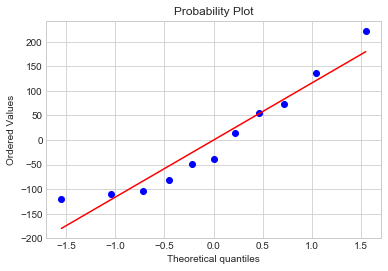

In [8]:
stats.mstats.normaltest(res)
stats.probplot(res, plot = plt)
plt.show()


In [9]:
import mglearn

D:\Programs\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Programs\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


D:\Programs\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


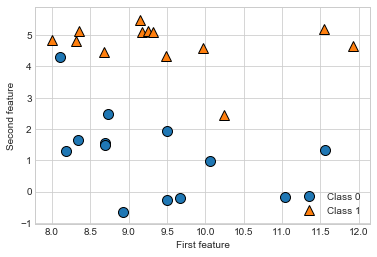

In [10]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))